In [9]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
path ='/content/drive/MyDrive/shapes/'
image=[]
label=[]
c=0
for dir in os.listdir(path):
  for item in tqdm(os.listdir(path+dir)):
    temp= Image.open(path+dir+'/'+item).resize((60,60))
    image.append(np.array(temp).flatten()/255.0)
    label.append(c)
  c+=1


100%|██████████| 3720/3720 [00:51<00:00, 72.30it/s] 


In [66]:
y = to_categorical(label)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(image,y,test_size=0.2)

In [68]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [99]:
model= Sequential()

In [100]:
model.add(Dense(64,'relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128,'relu'))
model.add(Dense(4,'softmax'))

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                230464    
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 4)                 516       
                                                                 
Total params: 239300 (934.77 KB)
Trainable params: 239300 (934.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
model.compile(optimizer=Adam(0.001),loss='categorical_crossentropy',metrics='accuracy')

In [103]:
history=model.fit(X_train,y_train,batch_size=300,epochs=35,validation_split=0.02)

Epoch 1/35
40/40 [==============================] - 1s 10ms/step - loss: 0.8983 - accuracy: 0.6272 - val_loss: 0.3001 - val_accuracy: 0.9208
Epoch 2/35
40/40 [==============================] - 0s 6ms/step - loss: 0.2731 - accuracy: 0.9033 - val_loss: 0.0839 - val_accuracy: 1.0000
Epoch 3/35
40/40 [==============================] - 0s 6ms/step - loss: 0.1066 - accuracy: 0.9758 - val_loss: 0.0230 - val_accuracy: 0.9958
Epoch 4/35
40/40 [==============================] - 0s 5ms/step - loss: 0.0637 - accuracy: 0.9849 - val_loss: 0.0120 - val_accuracy: 0.9958
Epoch 5/35
40/40 [==============================] - 0s 6ms/step - loss: 0.0481 - accuracy: 0.9895 - val_loss: 0.0341 - val_accuracy: 0.9958
Epoch 6/35
40/40 [==============================] - 0s 5ms/step - loss: 0.0440 - accuracy: 0.9888 - val_loss: 0.0084 - val_accuracy: 0.9958
Epoch 7/35
40/40 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.9921 - val_loss: 0.0103 - val_accuracy: 0.9958
Epoch 8/35
40/40 [=

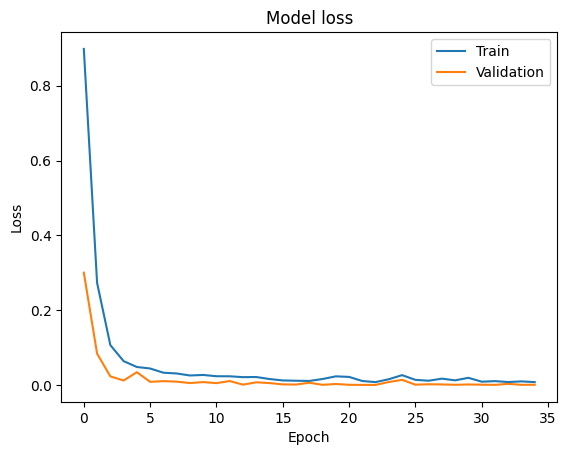

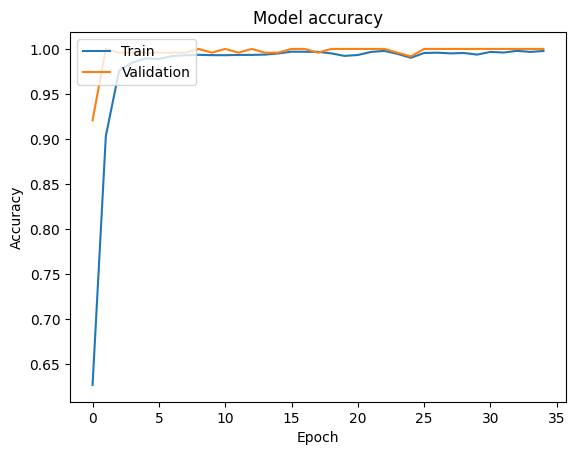

In [104]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_loss(history)
plot_accuracy(history)


In [105]:
model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


array([[3.0408581e-14, 8.1479922e-04, 9.9901867e-01, 1.6648222e-04],
       [9.9999917e-01, 7.8054069e-07, 6.1074135e-10, 1.8518587e-10],
       [1.9848368e-07, 9.9999905e-01, 7.3465969e-07, 1.9782272e-10],
       ...,
       [9.9533181e-14, 2.6615354e-04, 9.9783224e-01, 1.9014959e-03],
       [6.0906651e-04, 9.9939036e-01, 6.6585450e-08, 4.8944469e-07],
       [6.6906598e-16, 2.1758296e-05, 9.9843150e-01, 1.5467349e-03]],
      dtype=float32)

In [106]:
score, acc = model.evaluate(X_test, y_test,batch_size=200)
print('score:', score)
print('accuracy:', acc)

15/15 [==============================] - 0s 4ms/step - loss: 8.5811e-04 - accuracy: 1.0000
score: 0.0008581106085330248
accuracy: 1.0


In [166]:
img = Image.open('test.png')
test = Image.open('test.png').convert('L')
test = test.resize((60,60))
test = np.array(test).astype('float32')/255
test= np.reshape(test,(1,60*60))

In [167]:
test.shape

(1, 3600)

1/1 [==============================] - 0s 18ms/step


Text(0.5, 1.0, 'predict:triangle')

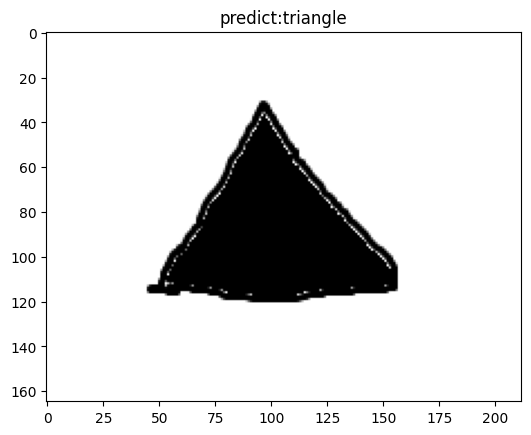

In [168]:
answers = model.predict(test)
label_pre = np.argmax(answers)
if label_pre == 0:
  pre = 'circle'
elif label_pre==1:
  pre = 'square'
elif label_pre==2:
  pre = 'star'
elif label_pre==3:
  pre = 'triangle'
  plt.imshow(img)
plt.title(f'predict:{pre}')